In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Data Extraction

In [2]:
data = pd.read_csv(r"C:\Users\ragha\Downloads\car_evaluation.csv", header=None)

### Data Cleaning

In [3]:
data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
data.tail()

,0,1,2,3,4,5,6
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.columns = col_names

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
data.describe().T

,count,unique,top,freq
buying,1728,4,vhigh,432
maint,1728,4,vhigh,432
doors,1728,4,2,432
persons,1728,3,2,576
lug_boot,1728,3,small,576
safety,1728,3,low,576
class,1728,4,unacc,1210


In [8]:
for i in data.columns:
    print(data[i].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [9]:
data["doors"] = data["doors"].replace("5more", 5)
data["persons"] = data["persons"].replace("more", 5)

data["doors"] = data["doors"].astype("int")
data["persons"] = data["persons"].astype("int")

In [10]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [11]:
data.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in data.columns:
    if i!="doors" and i!="persons":
        data[i] = le.fit_transform(data[i])

In [13]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,2,2,1,2
1,3,3,2,2,2,2,2
2,3,3,2,2,2,0,2
3,3,3,2,2,1,1,2
4,3,3,2,2,1,2,2


### Exploratory Data Analysis

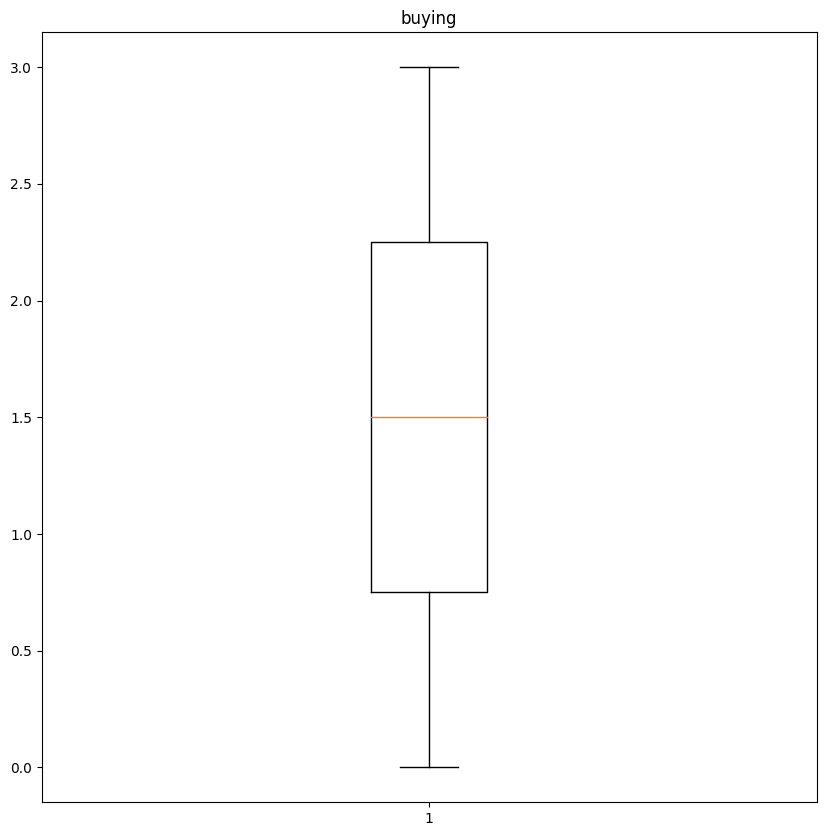

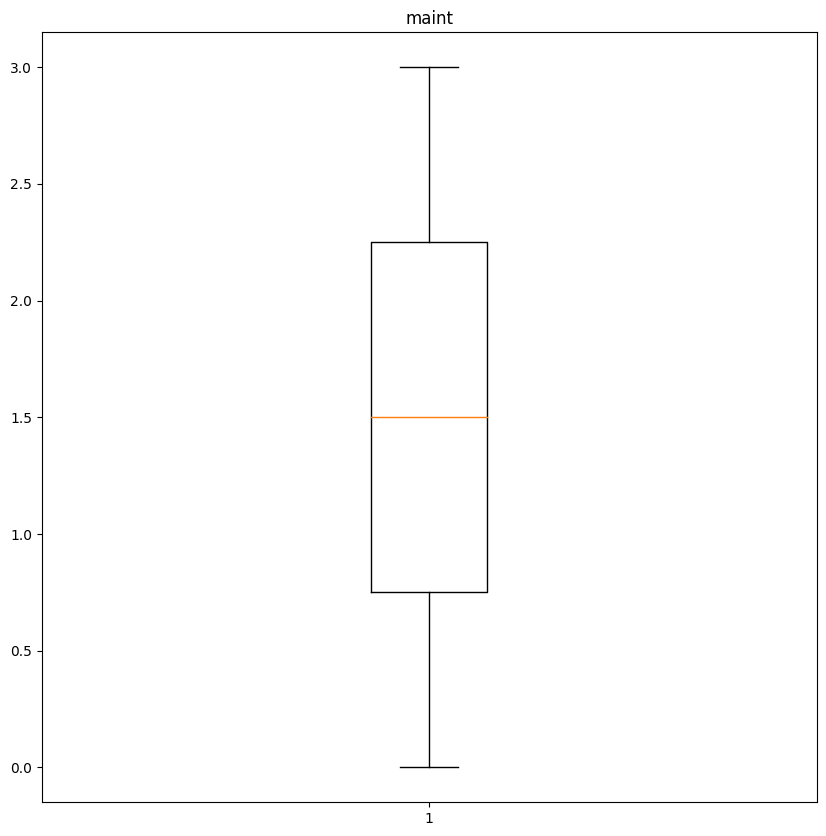

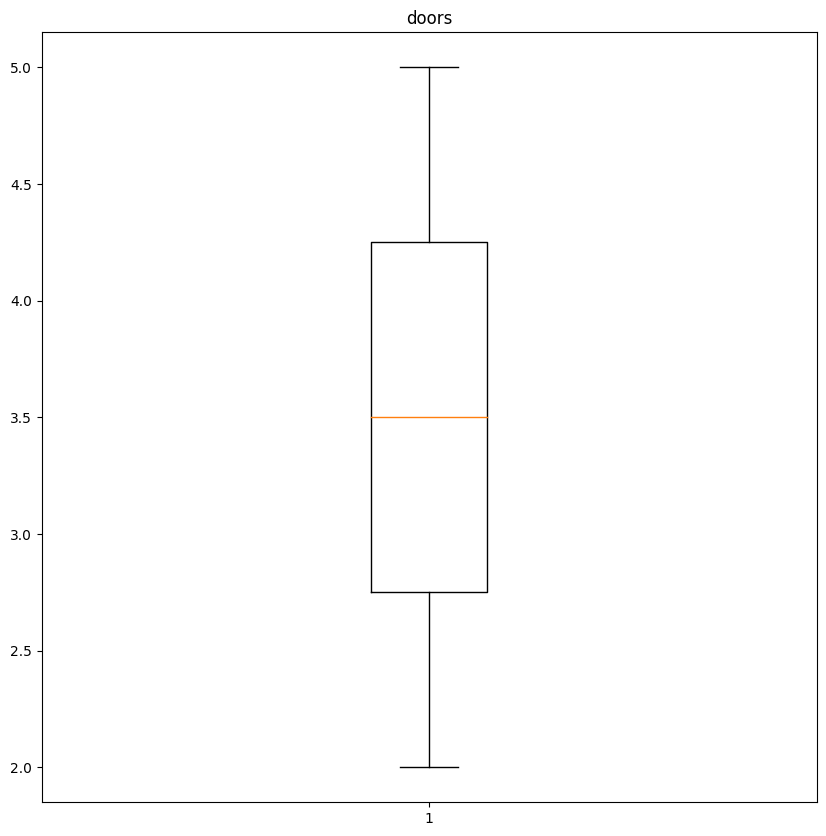

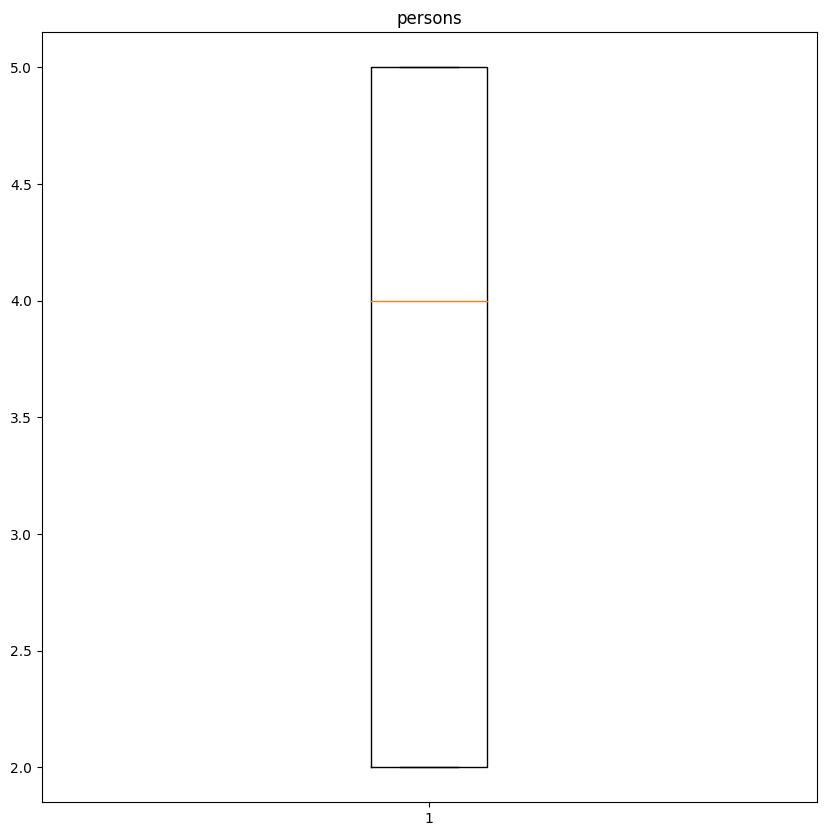

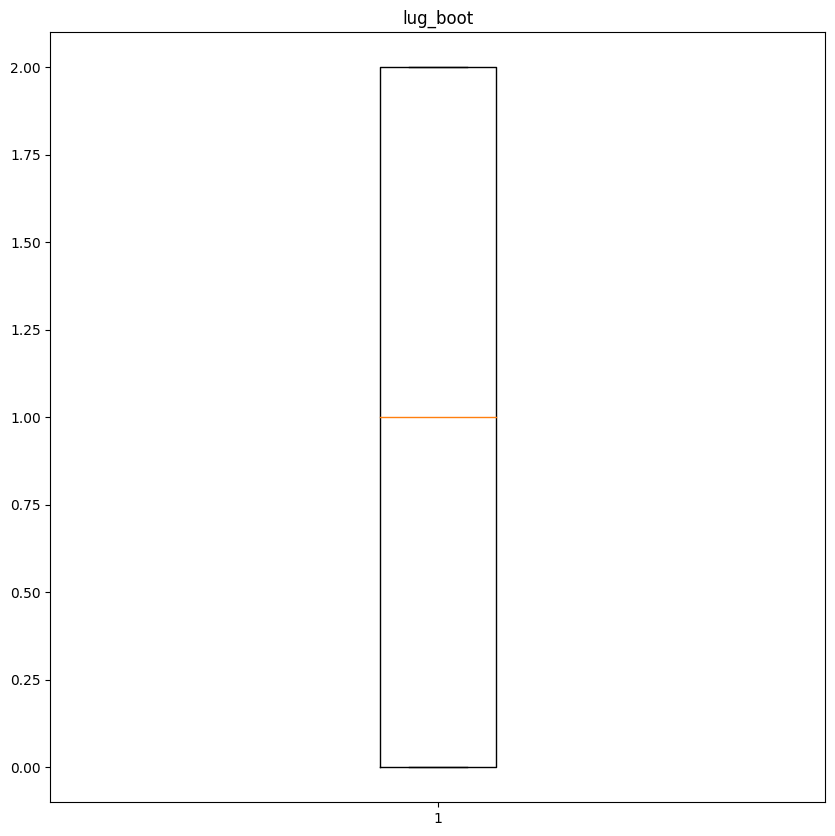

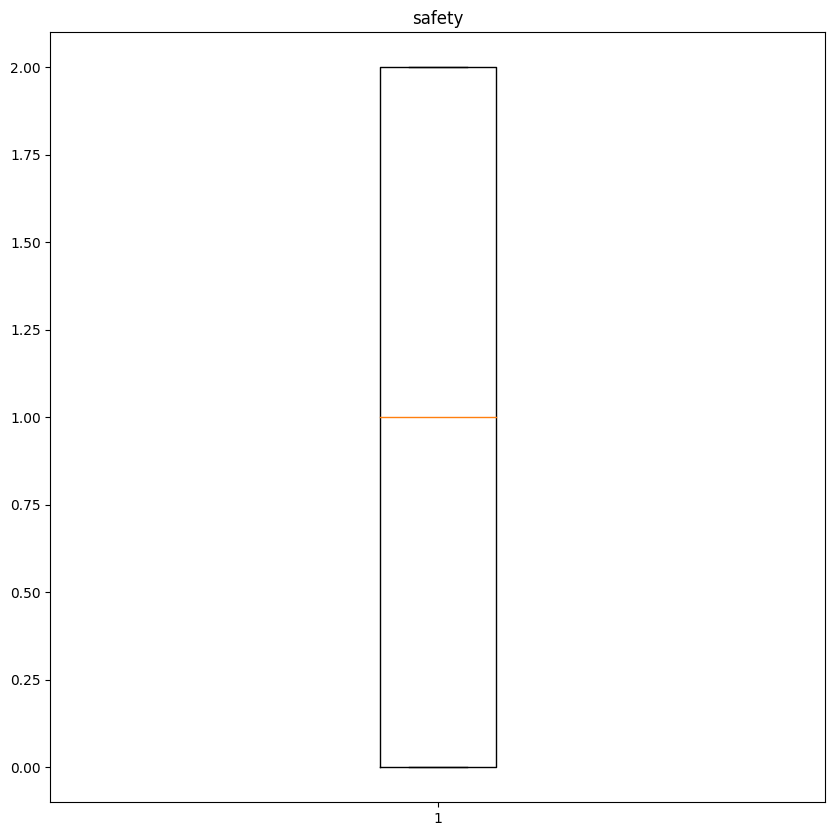

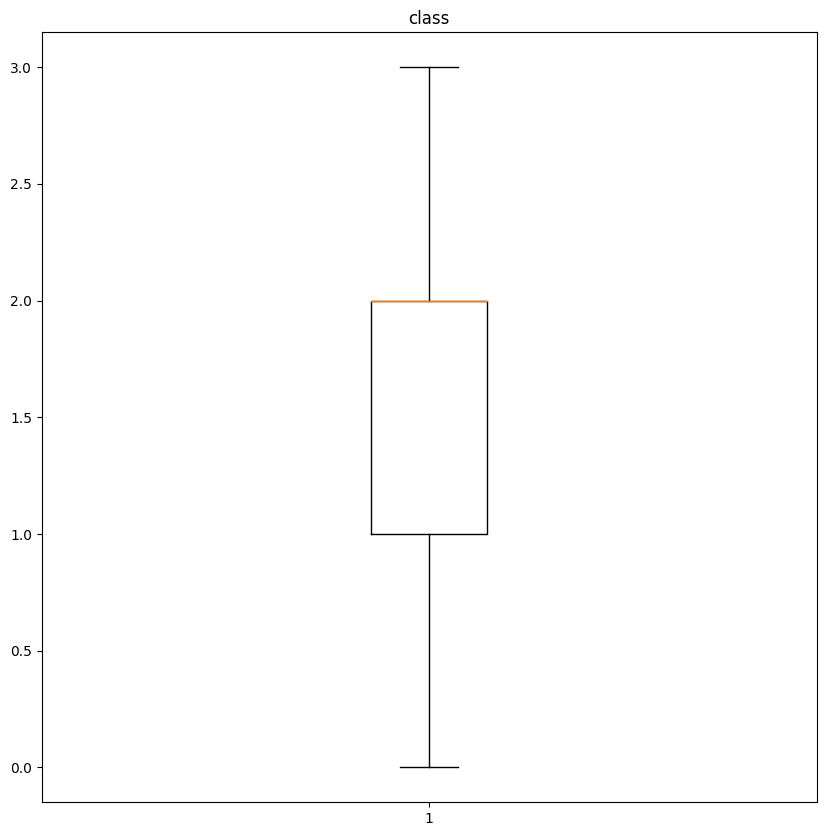

In [18]:
for col in data.columns:
    fig, ax = plt.subplots(figsize=(10,10))
    ax.boxplot(data.loc[:, col].dropna())
    ax.set_title(col)
    plt.show()

In [19]:
## There Is no outliers

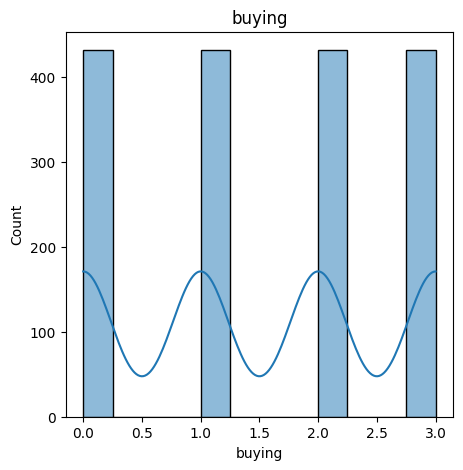

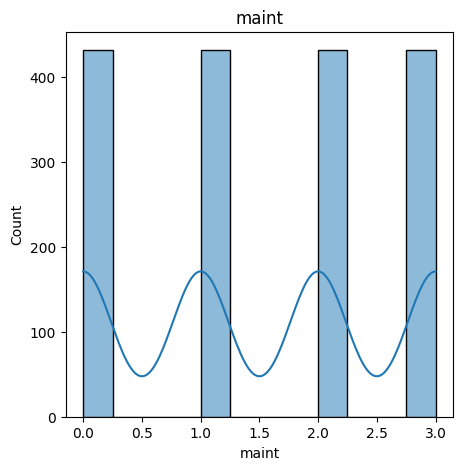

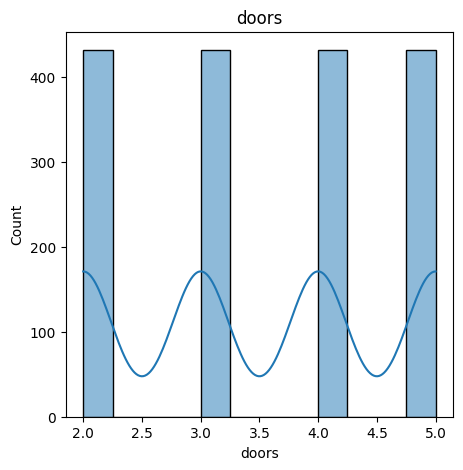

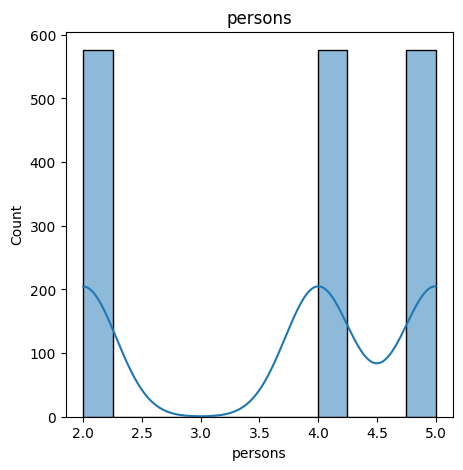

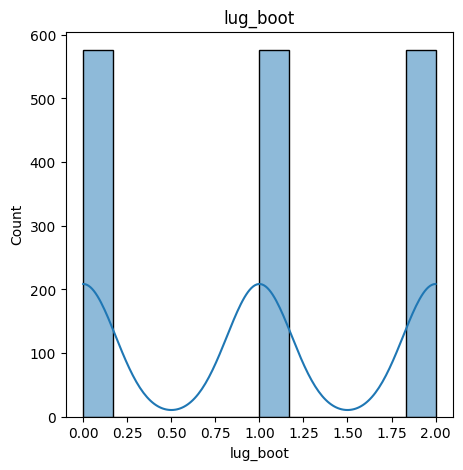

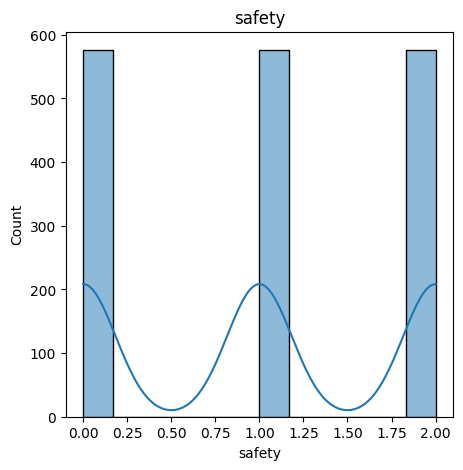

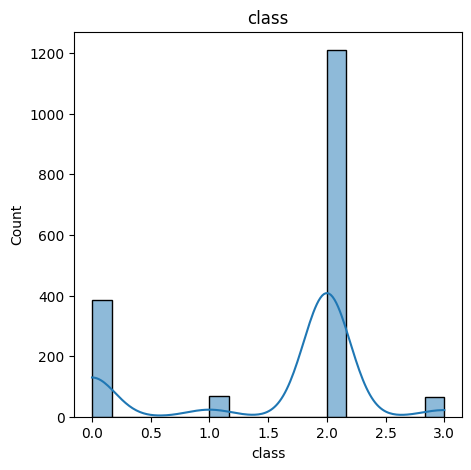

In [20]:
for col in data.columns:
    fig, ax = plt.subplots(figsize=(5,5))
    sns.histplot(data.loc[:, col].dropna() , kde = True)
    ax.set_title(col)
    plt.show()

In [21]:
## Even though the data are categorical there is no outliers

### Feature Engineering

In [22]:
## Due to data are categorical It is not required to standard scale or scaling.


### Splitting Data

In [23]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

### Model Building

In [25]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
Pred = dt.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, Pred)

array([[ 81,   0,   3,   1],
       [  1,  14,   0,   0],
       [  2,   0, 230,   0],
       [  2,   0,   0,  12]], dtype=int64)

In [28]:
print(classification_report(y_test, Pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95        85
           1       1.00      0.93      0.97        15
           2       0.99      0.99      0.99       232
           3       0.92      0.86      0.89        14

    accuracy                           0.97       346
   macro avg       0.96      0.93      0.95       346
weighted avg       0.97      0.97      0.97       346



In [29]:
from sklearn.metrics import r2_score

print(r2_score(y_test, Pred)*100)

83.12760964310749


In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [31]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

In [32]:
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [33]:
# Evaluate the model performance on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f"Accuracy on test set: {accuracy}")

Accuracy on test set: 0.9682080924855492
